In [1]:
# Import all the necessary classes.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [2]:
# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

### Gera exemplos de quatro classes.

In [3]:
# Number of examples.
N = 1000

# Create 4-class dataset for classification.
centers = [[-5, 0], [0, 1.5], [5, -1], [10, 1.5]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

### Plota as 4 classes.

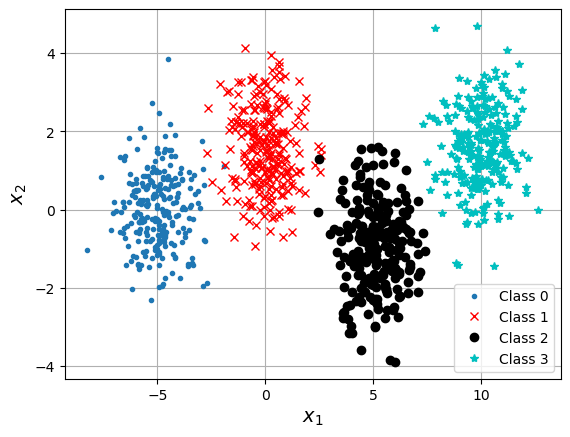

In [4]:
# Indexes of elements belonging to each class.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)
idx3 = np.argwhere(y == 3)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Um-Contra-o-Resto

$Q = 4$, portanto, devemos treinar $4$ classificadores binários (e.g., regressor logístico).

A classe `OneVsRestClassifier` automatiza o treinamento dos $Q = 4$, nós só precisamos passar um classificador binário para a classe, que se encarrega do resto.

In [5]:
# Divide o conjunto total de amostras.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Instancia o objeto Um-Contra-o-Resto.
clf = OneVsRestClassifier(LogisticRegression())

# Treina os Q classificadores binários.
clf.fit(X_train, y_train)

# Realiza predições com o conjunto de validação.
y_pred = clf.predict(X_test)

# Calcula a acurácia.
accuracy_score(y_test, y_pred)

0.9633333333333334

### Matriz de confusão

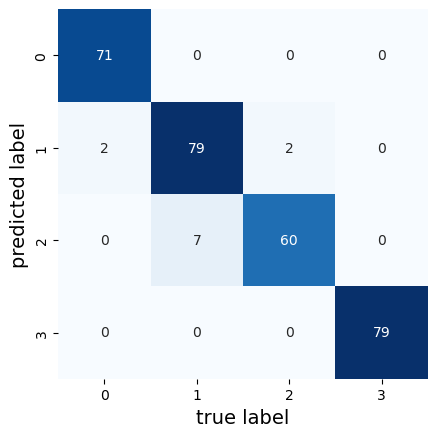

In [6]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2','3'], yticklabels=['0','1','2','3'], cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.show()

### Regiões de decisão.

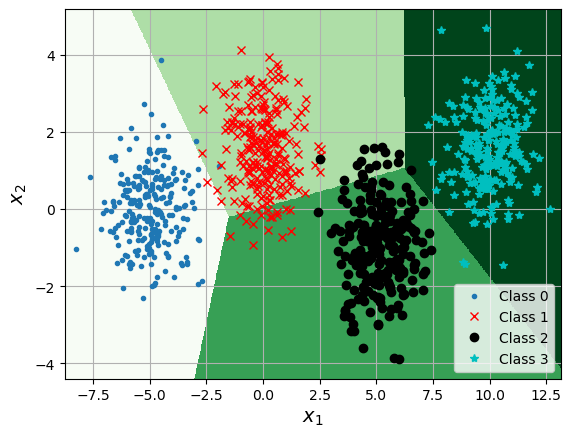

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[xx.ravel(), yy.ravel()]

Z = clf.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Um-Contra-Um

$Q = 4$, assim, devemos treinar $\frac{Q(Q-1)}{2} = 6$ classificadores binários.

A classe `OneVsOneClassifier` automatiza o treinamento dos $\frac{Q(Q-1)}{2} = 6$, nós só precisamos passar um classificador binário para a classe, que se encarrega do resto.

In [8]:
# Divide o conjunto total de amostras.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Instancia o objeto Um-Contra-o-Resto.
clf = OneVsOneClassifier(LogisticRegression())

# Treina os Q classificadores binários.
clf.fit(X_train, y_train)

# Realiza predições com o conjunto de validação.
y_pred = clf.predict(X_test)

# Calcula a acurácia.
accuracy_score(y_test, y_pred)

0.9966666666666667

### Matriz de confusão

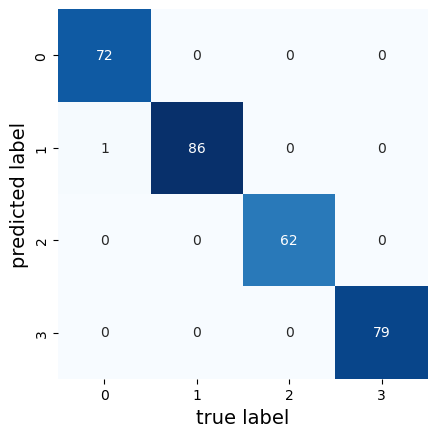

In [9]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2','3'], yticklabels=['0','1','2','3'], cmap="Blues")
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.show()

### Regiões de decisão

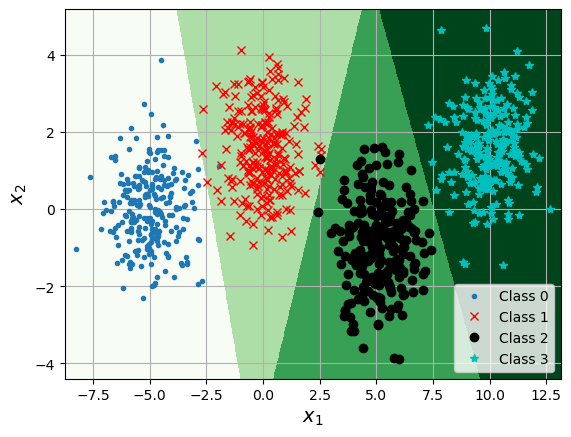

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[xx.ravel(), yy.ravel()]

Z = clf.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.plot(X[idx3,0], X[idx3,1], 'c*', label='Class 3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.legend(loc='lower right')
plt.show()